### 简单的对流方程
$\begin{cases}
\frac{\partial u}{\partial t}+\frac{\partial u}{\partial t}=0 \\u(x,0)=u_o
\end{cases}$

$u_0=\begin{cases}
 1,x\le 0\\0,x>0\end{cases}$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [40]:
#x [-1,1] 
dx = 0.01
cfl = 0.5
dt = dx * cfl 
t_n = 0.5#结束时间
xn = int(2 / dx) 
xn_m = int(1 / dx)
tn = int(t_n / dt)
xx = np.linspace(-1,1,xn,endpoint=True)

#初始条件
u = np.zeros(int(xn))
u[:int(xn_m)-1] = 1
#t_n时刻的解
u_n = np.piecewise(xx,[xx<=0.5, xx>0.5],[1, 0])



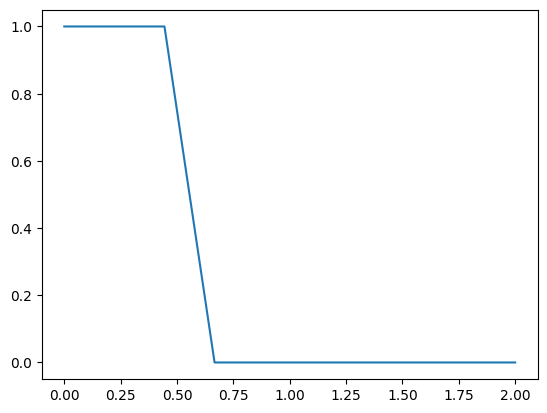

In [39]:
len(xx), xn
x_tex = np.linspace(0,2,10)
y = np.piecewise(x_tex,[x_tex<=0.5, x_tex>0.5],[1, 0])
plt.plot(x_tex, y)

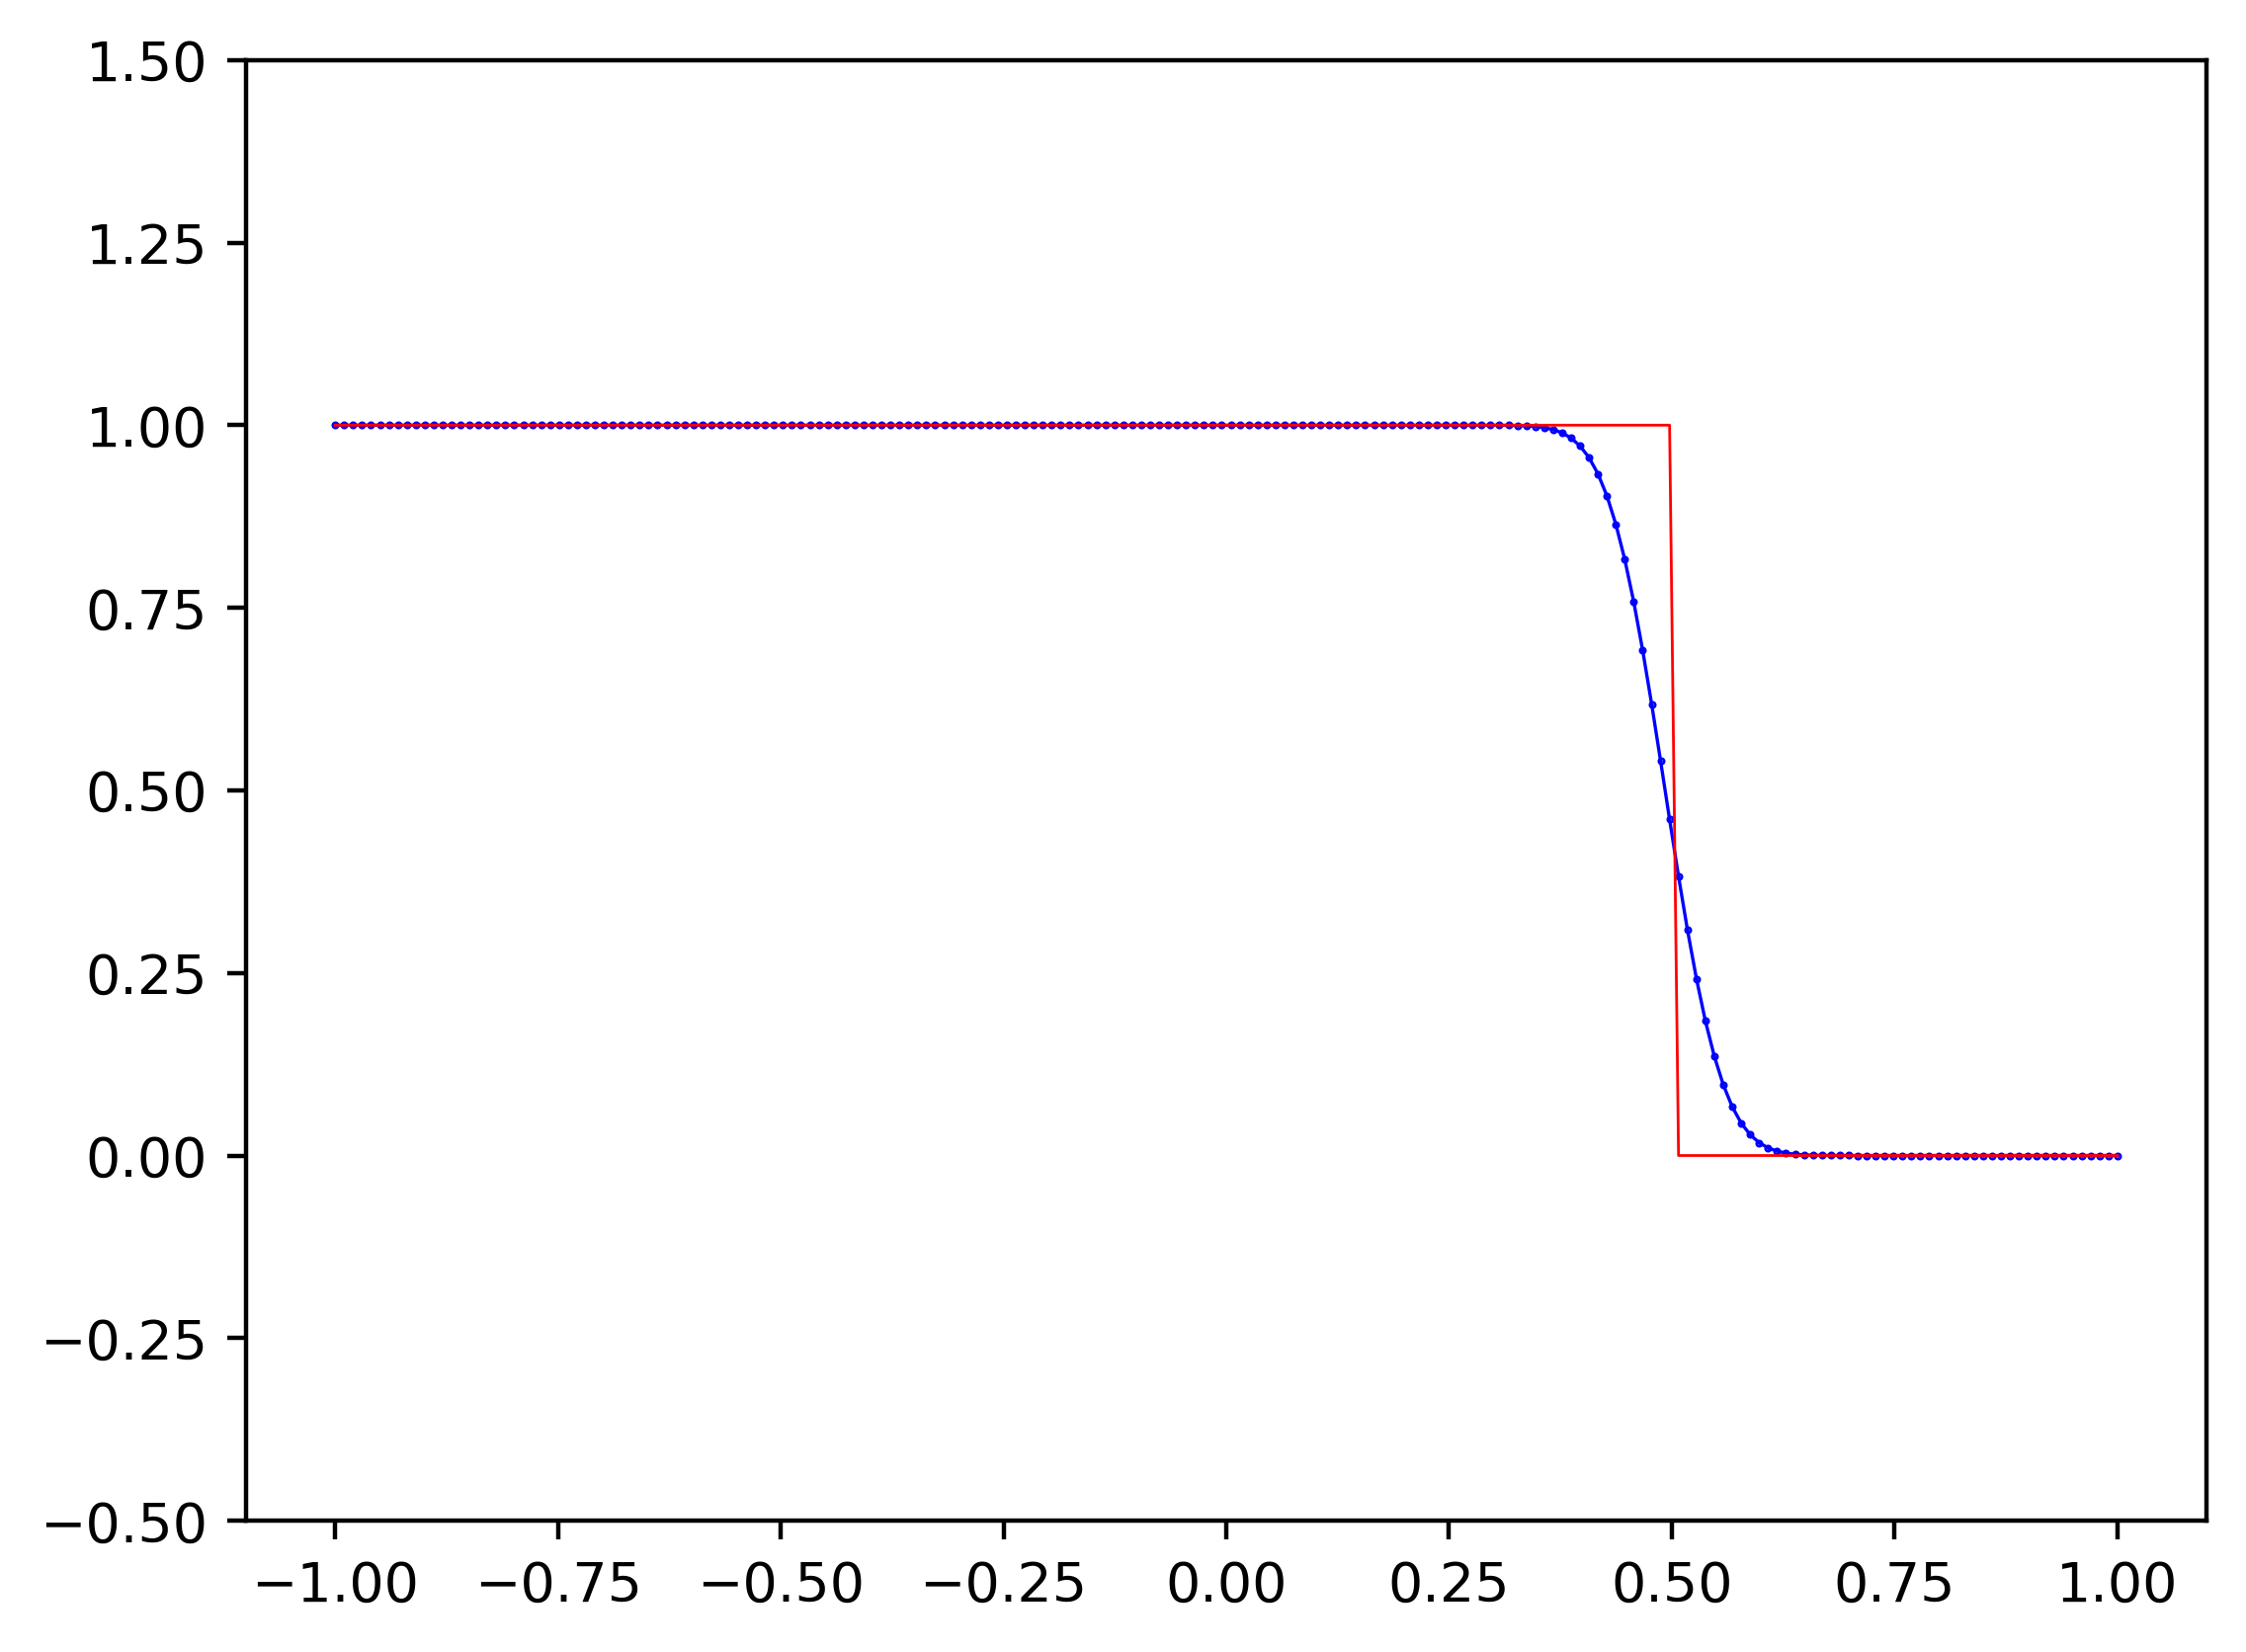

In [58]:
#迎风
u_upwind = u.copy()
for i in range(tn):
    un = u_upwind.copy()
    for j in range(1,xn):
        u_upwind[j] = un[j] - cfl * (un[j] - un[j-1])
plt.figure(dpi=400)
plt.plot(xx,u_upwind,'.-b',linewidth=0.6,markersize=0.9)
plt.ylim(-0.5,1.5)
plt.plot(xx,u_n,'-r',linewidth=0.5)

        

In [33]:
len(u_upwind) == len(xx)

True

(-0.5, 1.5)

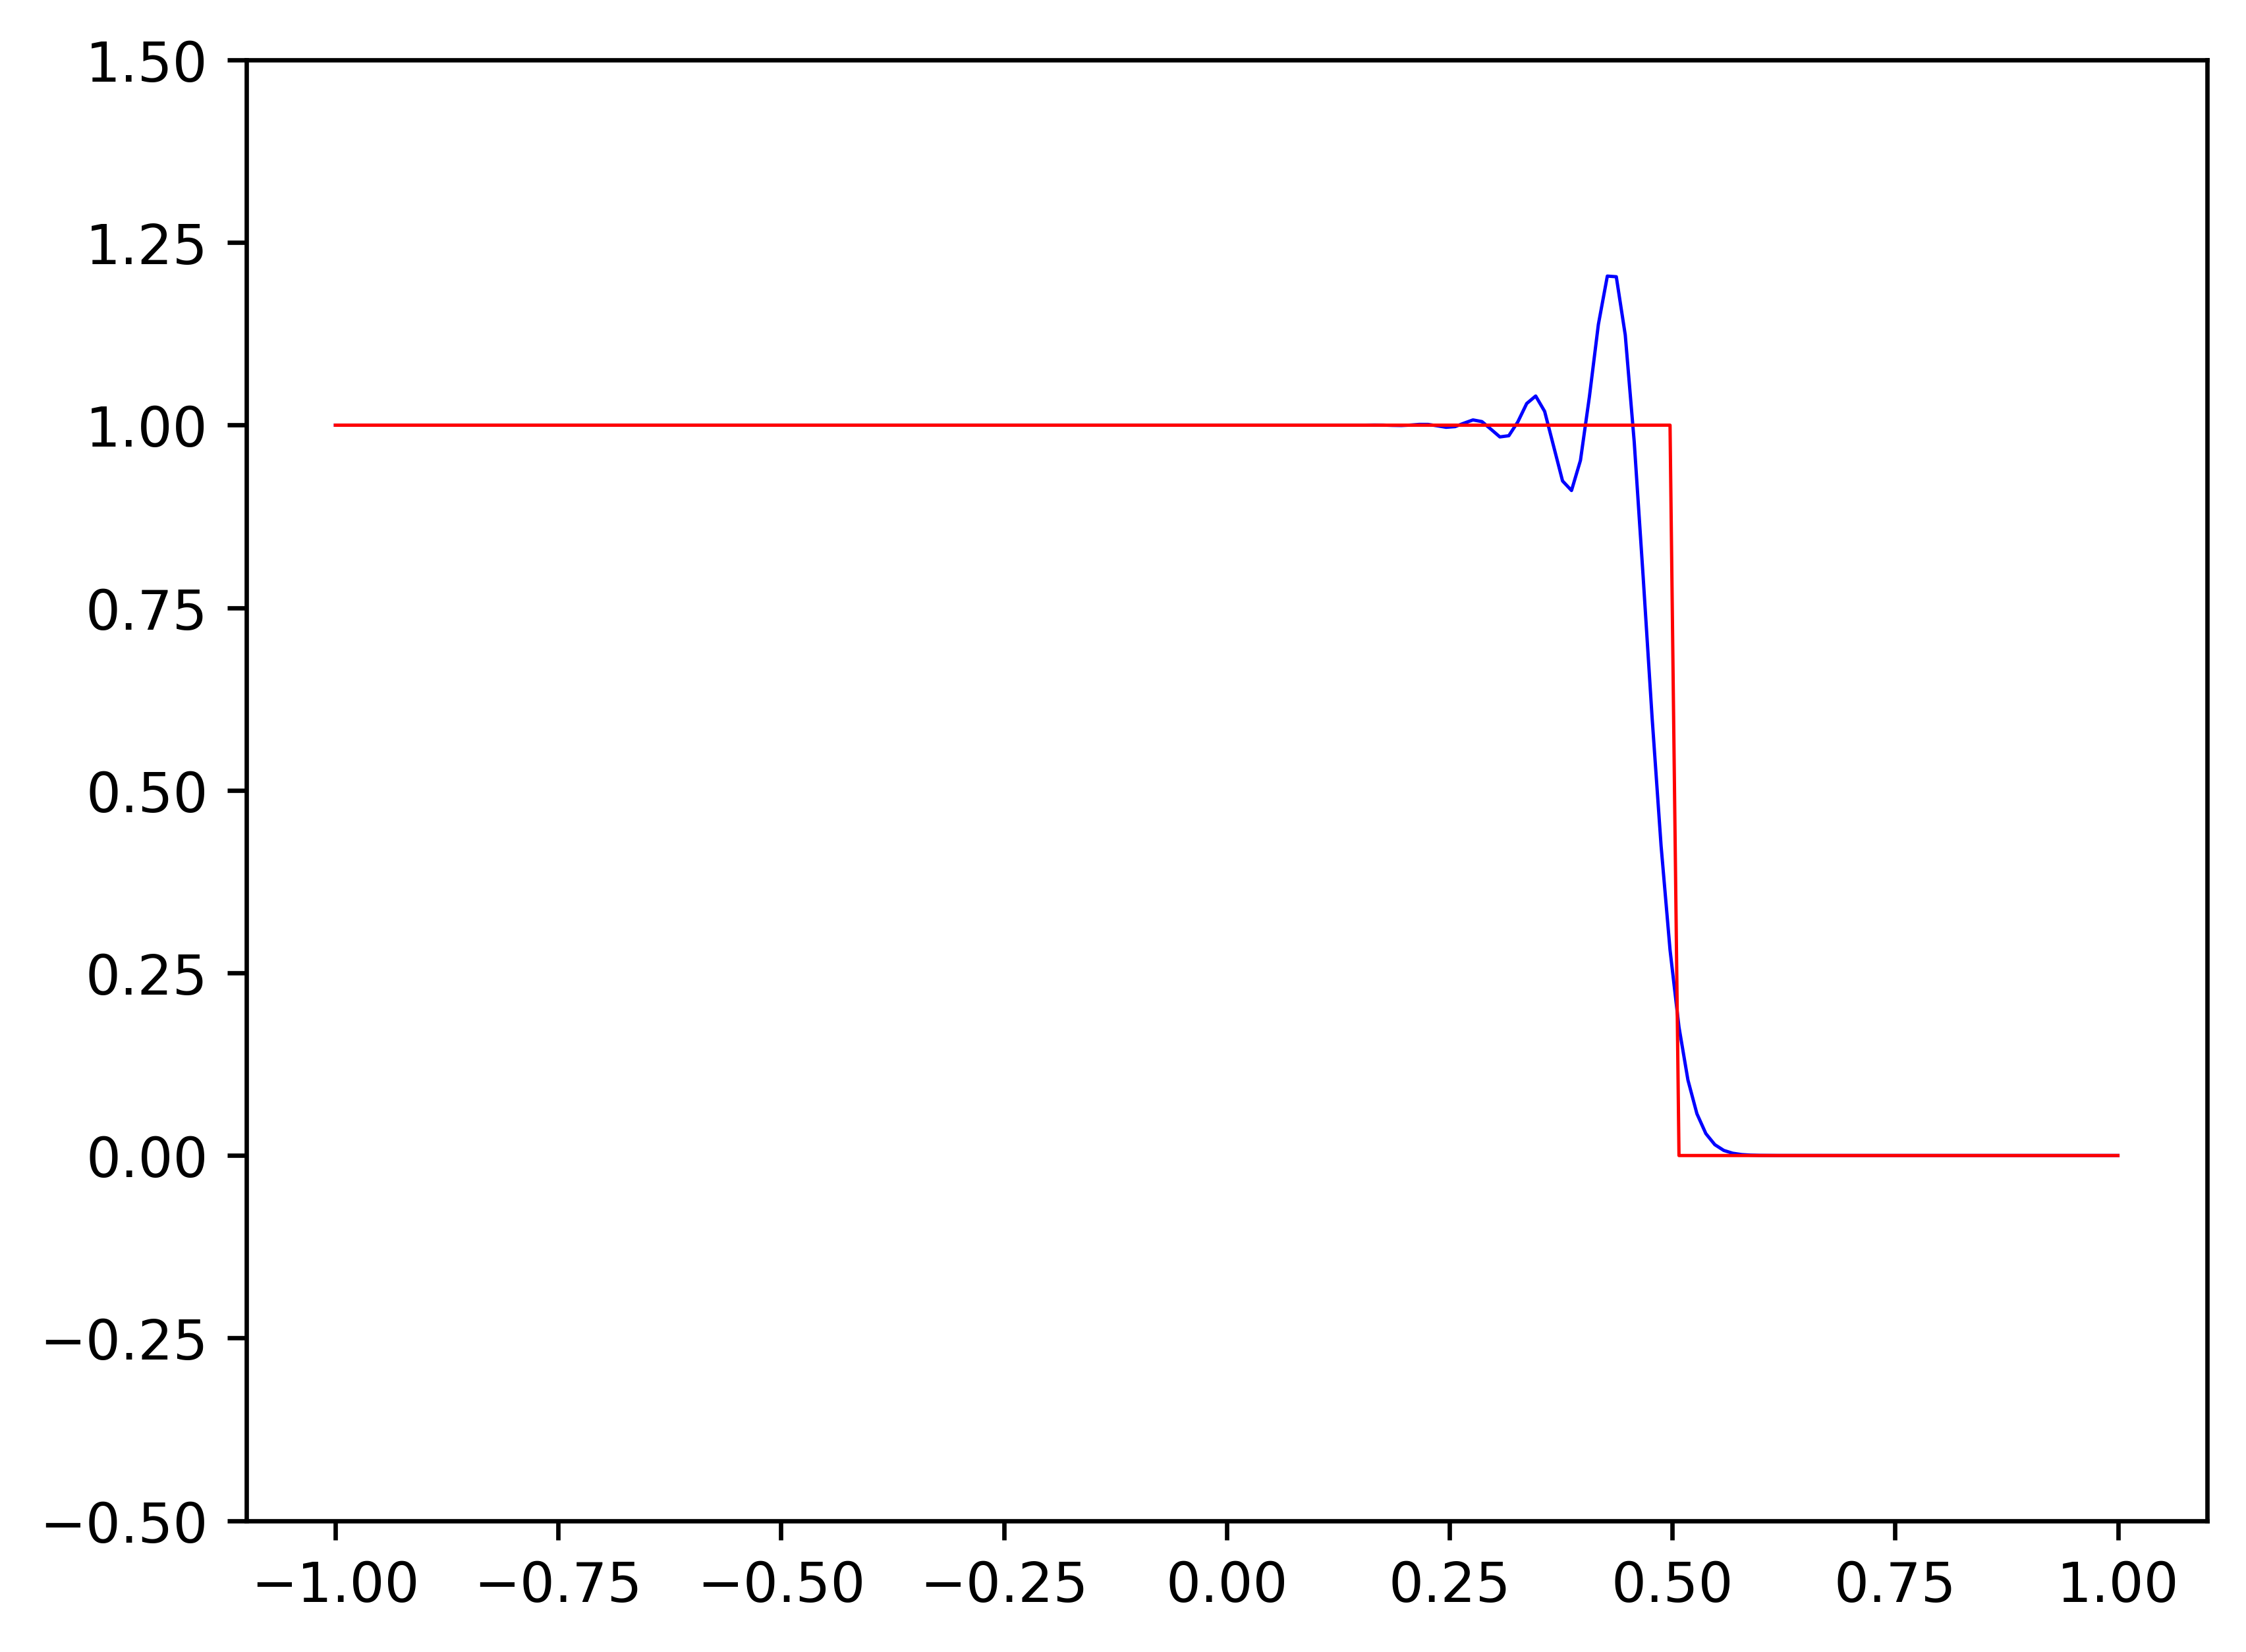

In [60]:
# lax-wendroff
u_wend = u.copy()
for i in range(tn):
    un1 = u_wend.copy()
    for j in range(1,xn-1):
        u_wend[j] = un1[j] - cfl/2 * (un1[j+1] - un1[j-1]) + cfl**2/2 * (un1[j+1] - 2*un1[j] + un1[j-1])
        
plt.figure(dpi=600)
plt.plot(xx,u_wend, '-b',linewidth=0.6)
plt.plot(xx,u_n,'-r',linewidth=0.6)
plt.ylim(-0.5,1.5)

In [62]:
err_upwind = np.sum(abs(u_n - u_upwind))
err_wend = np.sum(abs(u_n - u_wend))
err_upwind, err_wend

(4.059051106746115, 3.422572038294566)